In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import interpolate
from scipy import constants
from scipy import integrate
from scipy import optimize
from astropy.table import Table
%matplotlib inline 
c = constants.c

/Users/jorge/Library/Enthought/Canopy_64bit/User/lib/python2.7/site-packages/IPython/kernel/__init__.py:13: ShimWarning: The `IPython.kernel` package has been deprecated. You should import from ipykernel or jupyter_client instead.
  "You should import from ipykernel or jupyter_client instead.", ShimWarning)


1.Use spline interpolation to interpolate the SED for the first object and overplot the interpolated SED in pink on the plot you just created.

In [11]:
# Read the fluxes from the created fits file. 
# Read fluxes similar as in Session4

fluxes = Table.read('Fluxes.fits')

colnames = ('u', 'g', 'r', 'i', 'z', 'Y', 
            'J', 'H', 'K', 'W1', 'W2', 'W3', 'W4')

colnames_err = ('u_err', 'g_err', 'r_err', 'i_err', 'z_err', 'Y_err', 
            'J_err', 'H_err', 'K_err', 'W1_err', 'W2_err', 'W3_err', 'W4_err')

n_cols = len(colnames)
sel_gals = np.zeros((3, n_cols))
sel_gals_err = np.zeros((3, n_cols))

for j in range(3):
    for i in range(n_cols):
        tmp_col = colnames[i]
        tmp_colerr = colnames_err[i]
        sel_gals[j, i] = fluxes[j][tmp_col]
        sel_gals_err[j, i] = fluxes[j][tmp_colerr]

flux1 = sel_gals[0,:]
flux1e = sel_gals_err[0,:]

flux3 = sel_gals[2,:]
flux3e = sel_gals_err[2,:]

In [12]:
mu = np.array([0.3543, 0.4770, 0.6231, 0.7625, 
               0.9134, 1.0305, 1.2483, 1.6313, 
               2.2010, 3.40, 4.60, 12.00, 22.00])

In [13]:
# create interpolating function
funct1 = interpolate.interp1d(mu,flux1,kind = 'slinear')

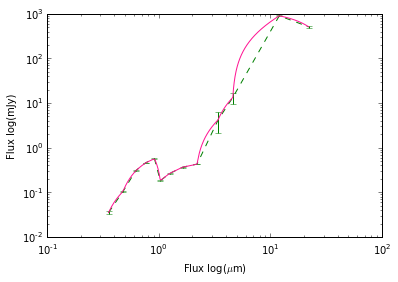

In [14]:
x_range = np.linspace(mu[0],mu[-1], num=1000)
plt.errorbar(mu,flux1, yerr=flux1e, color= 'green',linestyle = 'dashed')
plt.plot(x_range, funct1(x_range),color ='deeppink')
plt.ylabel('Flux log(mJy)')
plt.xlabel('Flux log($\mu$m)')
plt.xscale('log')
plt.yscale('log')

2.Integrate the flux from 0.5um to 2um (caution the flux is in F_nu, while we are plotting lambda on the x-axis). That means you’ll have to convert 0.5um and 2um to Hz. F_nu is in mJy while one Jy is 1.e-23 erg/(s\*cm^2\*Hz). Express the integral in erg/(s\*cm^2).

In [15]:
mu_m = np.asarray(mu)*1e-6
nu = c / mu_m[::-1]
flux1_Fnu = flux1*1e-3*(1e-23)

In [16]:
funct2 = interpolate.interp1d(nu,flux1_Fnu,kind = 'slinear')

In [17]:
intarr, err = integrate.quad(funct2,c/(2.0*1e-6), c/(0.5*1e-6))
print intarr,err

4.48384376053e-10 1.75305620903e-10


3.Write a BB function to fit the W2, W3 and W4 bands to the third object with a blackbody. Free parameters should be T and normalization. Give initial guesses for T and norm of 30K and 1.e-33. 

In [18]:
# Define the Blackbody function. Note that the factor 2*h/c^3 is part of the normalization.
hb = constants.h
kb = constants.k
def bb(nu,T, norm):
    return norm*nu**3/(np.exp(hb*nu/(kb*T))-1.)

In [19]:
#Getting the fluxes in each of the asked bands... sure there is a clean way to get it! 
sel = fluxes[:3]
flux3  = [sel[2][4], sel[2][6],sel[2][8],sel[2][10],sel[2][12],sel[2][14],sel[2][16],sel[2][18],sel[2][20],sel[2][22],sel[2][24],sel[2][26],sel[2][28]]
flux3e = [sel[2][5], sel[2][7],sel[2][9],sel[2][11],sel[2][13],sel[2][15],sel[2][17],sel[2][19],sel[2][21],sel[2][23],sel[2][25],sel[2][27],sel[2][29]]

new_mu = np.asarray(mu[-4:])
new_f  = np.asarray(flux3[-4:])
# fit BB function, caution with wavelength and frequency!
param, covar = optimize.curve_fit(bb, c/(new_mu*1.e-6), new_f, p0=[30, 1.e-33])
print param

[  4.02053266e+02   1.29764549e-36]


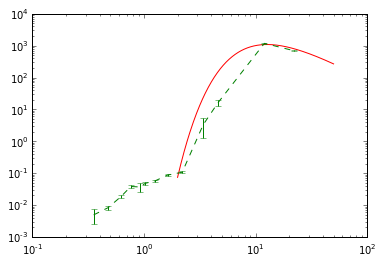

In [20]:
x_range = np.linspace(2, 50, num = 1000, endpoint = True)
plt.plot (x_range, bb(c/(x_range*1e-6), *param), '-r')
plt.errorbar(mu,flux3, yerr=flux1e, color= 'green',linestyle = 'dashed')
plt.xscale('log')
plt.yscale('log')

4.Integrated the BB flux between 1 and 1000 um. 

In [21]:
T1    = param[0]
norm1 = param[1]
BB_funct2 = lambda nu:  norm1*nu**3/(np.exp(hb*nu/(kb*T1))-1.)
integrate_result2  = integrate.quad(BB_funct2, 3.e8/(1000.e-6), 3.e8/(1.e-6))
print(integrate_result2[0]) # take care of units here....

4.15055883665e+16
